# Self Organizing Map

## Import libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


## Training the SOM

In [16]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)


## Visualize results

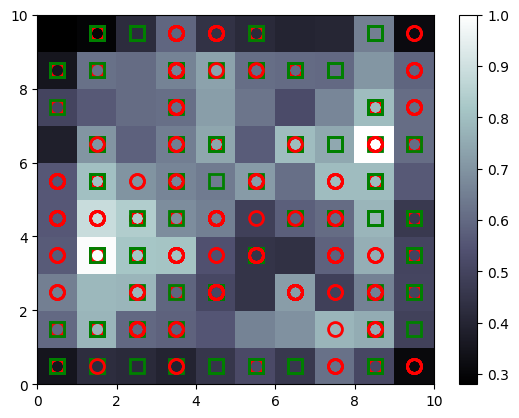

In [17]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2
    )
show()

## Finding the frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,3)], mappings[(8,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

print(frauds)